In [2]:
from __future__ import print_function
import torch as t

In [3]:
x = t.Tensor(5,3)
x


 0.0000e+00  0.0000e+00  4.4969e-29
-3.6893e+19  8.4078e-45  6.4460e-44
 1.1771e-43  1.4153e-43  1.5414e-43
 1.6115e-43  1.5554e-43  1.5975e-43
 5.6052e-44  7.4269e-44  6.1657e-44
[torch.FloatTensor of size 5x3]

In [5]:
x = t.rand(5,3)
x


 0.2333  0.0867  0.1085
 0.4650  0.2003  0.0510
 0.6204  0.9944  0.4760
 0.0187  0.3315  0.7084
 0.7736  0.9160  0.8163
[torch.FloatTensor of size 5x3]

In [7]:
x.size()

torch.Size([5, 3])

In [8]:
x.size()[0]

5

In [9]:
x.size(1)

3

In [10]:
y = t.rand(5,3)

In [11]:
x + y


 0.8381  0.5215  0.6953
 1.4342  0.8551  1.0329
 1.0111  1.2027  0.9870
 0.7770  0.6828  1.3573
 1.2129  1.4113  1.4477
[torch.FloatTensor of size 5x3]

In [12]:
x.add(y)


 0.8381  0.5215  0.6953
 1.4342  0.8551  1.0329
 1.0111  1.2027  0.9870
 0.7770  0.6828  1.3573
 1.2129  1.4113  1.4477
[torch.FloatTensor of size 5x3]

In [13]:
x


 0.2333  0.0867  0.1085
 0.4650  0.2003  0.0510
 0.6204  0.9944  0.4760
 0.0187  0.3315  0.7084
 0.7736  0.9160  0.8163
[torch.FloatTensor of size 5x3]

In [14]:
x.add_(y)


 0.8381  0.5215  0.6953
 1.4342  0.8551  1.0329
 1.0111  1.2027  0.9870
 0.7770  0.6828  1.3573
 1.2129  1.4113  1.4477
[torch.FloatTensor of size 5x3]

In [15]:
x


 0.8381  0.5215  0.6953
 1.4342  0.8551  1.0329
 1.0111  1.2027  0.9870
 0.7770  0.6828  1.3573
 1.2129  1.4113  1.4477
[torch.FloatTensor of size 5x3]

In [24]:
resulut = t.Tensor(5,3)
t.add(x,y,out=result)


 1.4429  0.9564  1.2821
 2.4034  1.5100  2.0147
 1.4017  1.4110  1.4980
 1.5353  1.0342  2.0061
 1.6521  1.9066  2.0792
[torch.FloatTensor of size 5x3]

In [25]:
x


 0.8381  0.5215  0.6953
 1.4342  0.8551  1.0329
 1.0111  1.2027  0.9870
 0.7770  0.6828  1.3573
 1.2129  1.4113  1.4477
[torch.FloatTensor of size 5x3]

In [26]:
x[:,1]


 0.5215
 0.8551
 1.2027
 0.6828
 1.4113
[torch.FloatTensor of size 5]

In [28]:
s = t.ones(4)

In [29]:
s.numpy()

array([1., 1., 1., 1.], dtype=float32)

In [30]:
x = s.numpy()

In [31]:
t.from_numpy(x)


 1
 1
 1
 1
[torch.FloatTensor of size 4]

In [36]:
from torch.autograd import Variable

In [37]:
x = Variable(t.ones(2,2),requires_grad=True)

In [38]:
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [40]:
y = x.sum()
y

Variable containing:
 4
[torch.FloatTensor of size 1]

In [41]:
y.grad_fn

In [42]:
y.backward

<bound method Variable.backward of Variable containing:
 4
[torch.FloatTensor of size 1]
>

In [50]:
y.backward()

In [51]:
x.grad

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [52]:
x.grad

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [106]:
import torch.nn as nn
import torch.nn.functional as F

In [107]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
#         两个卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
#         卷积 激活 池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [108]:
params = list(net.parameters())
params

[Parameter containing:
 (0 ,0 ,.,.) = 
  -0.0487 -0.1250  0.0912  0.1995 -0.1915
  -0.0310  0.0179  0.1930 -0.1164 -0.1444
   0.0603  0.0028  0.1783  0.1235 -0.0616
   0.0931  0.1648 -0.1583 -0.0163  0.0622
   0.1755  0.1699  0.0819  0.1822 -0.0723
 
 (1 ,0 ,.,.) = 
   0.1889 -0.1007  0.1123 -0.1148 -0.0750
  -0.1112 -0.1379 -0.1969  0.1978  0.1489
   0.1272 -0.0340  0.1492  0.1981  0.1559
   0.1724 -0.0765  0.1205  0.1454  0.1437
  -0.0375  0.0544 -0.0967 -0.1374  0.0758
 
 (2 ,0 ,.,.) = 
   0.1294  0.0733  0.0542 -0.1856  0.0434
   0.0800 -0.0929 -0.0161 -0.0836  0.0541
   0.0740 -0.1702  0.0287  0.0422 -0.1917
  -0.1321  0.1565 -0.0432  0.0869 -0.1929
   0.1264  0.1839  0.1882  0.1391  0.1149
 
 (3 ,0 ,.,.) = 
   0.0595  0.0447  0.0353  0.0099 -0.1737
   0.1645 -0.1517  0.0820 -0.0859  0.1446
   0.1278  0.1213 -0.0580  0.1415  0.1643
  -0.1655 -0.1156  0.1319  0.1658  0.1211
  -0.1263 -0.0868 -0.1894 -0.0495 -0.0274
 
 (4 ,0 ,.,.) = 
  -0.0143 -0.0537 -0.1487 -0.0186  0.0225
   0.12

In [109]:
for name,parameters in net.named_parameters():
    print(name, ':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [110]:
# forward函数的输入和输出都是Variable，只有Variable才具有自动求导功能，而Tensor是没有的，所以在输入时，需把Tensor封装成Variable。

In [111]:
input = Variable(t.randn(1,1,32,32))

In [112]:
out = net(input)
out.size()

torch.Size([1, 10])

In [113]:
net.zero_grad()
out.backward(Variable(t.ones(1,10)))

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

In [114]:
output = net(input)
target = Variable(t.arange(0,10))
criterion = nn.MSELoss()
loss = criterion(output,target)
loss

Variable containing:
 28.5753
[torch.FloatTensor of size 1]

In [116]:
loss

Variable containing:
 28.5753
[torch.FloatTensor of size 1]

In [117]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

Variable containing:
1.00000e-02 *
 -6.4331
  2.2923
  1.3315
  0.5483
  1.6035
 -4.3842
[torch.FloatTensor of size 6]



In [118]:
import torch.optim as optim

In [119]:
optimizer = optim.SGD(net.parameters(),lr=0.01)
optimizer.zero_grad()

out = net(input)
loss = criterion(out,target)

loss.backward()
optimizer.step()

In [124]:
loss.data[0]

28.575275421142578

In [128]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [196]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(), #to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# 训练集
trainset = tv.datasets.CIFAR10(
    root='/Users/guoliang/Desktop/Learning/tmp/data',
    train=True,
    download=True,
    transform=transform
)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# 测试集
testset = tv.datasets.CIFAR10(
    root='/Users/guoliang/Desktop/Learning/tmp/data',
    train=False,
    download=True,
    transform=transform
)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [165]:
# Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。
data,label = trainset[100]

In [166]:
print(classes[label])

ship


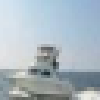

In [167]:
show((data+1)/2).resize((100,100))

       frog         car         dog         dog


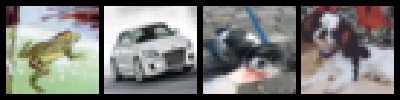

In [168]:
# Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。
dataiter = iter(trainloader)
images, labels = dataiter.next()# 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [169]:
labels


 6
 1
 5
 5
[torch.LongTensor of size 4]

In [197]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [198]:
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [199]:
t.set_num_threads(4)

for epoch in range(2):
    running_loss= 0.0
    for i, data in enumerate(trainloader,0):
        
#         输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs),Variable(labels)
        
#         梯度清零
        optimizer.zero_grad()
    
#         forward + backward
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
                                                   
#         更新参数
        optimizer.step()
                                                   
#         打印log信息
        running_loss = running_loss + loss.data[0]
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.159
[1,  4000] loss: 1.874
[1,  6000] loss: 1.702
[1,  8000] loss: 1.604
[1, 10000] loss: 1.539
[1, 12000] loss: 1.489
[2,  2000] loss: 1.423
[2,  4000] loss: 1.396
[2,  6000] loss: 1.345
[2,  8000] loss: 1.312
[2, 10000] loss: 1.297
[2, 12000] loss: 1.285
Finished Training


实际的label: 
     cat     ship     ship    plane


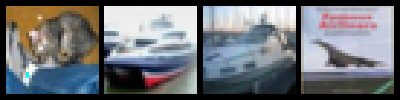

In [174]:
# 此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

dataiter = iter(testloader)
images,labels = dataiter.next()

print('实际的label: ')
print(' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [183]:
labels.size(0)

4

In [200]:
# 接着计算网络预测的label：
# torch.max(a,0) 返回每一列中最大值的那个元素，且返回索引（返回最大元素在这一列的行索引）
# torch.max(a,1) 返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引）

ouputs = net(Variable(images))
_,predicted = t.max(ouputs.data,1)

print('预测结果: ')
print(' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果: 
 frog   dog  deer horse


In [190]:
ouputs.data


-2.2309 -2.7426  1.0991  2.7321  0.9189  2.3925  3.5882 -0.2749 -2.8189 -2.3886
-0.7978 -2.2684  1.0527  2.1904  0.1949  2.6828 -0.8493  1.8787 -1.2972 -1.3253
 2.0136  4.0627 -0.0531  0.0388  0.1359 -0.9884 -1.6697 -1.9209 -0.2884  0.5951
-1.0545 -1.1390  0.2646 -0.8464  3.7769  0.5247  0.0501  5.6965 -4.5624 -0.8844
[torch.FloatTensor of size 4x10]

In [185]:
(predicted == labels).sum()

2

In [179]:
# 已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [217]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print(correct)
print(total)
print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

5298
10000
10000张测试集中的准确率为: 52 %


In [218]:
# 在GPU训练
# 就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [219]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    outputs = net(Variable(images))
    loss = criterion(outputs,Variable(labels))

In [ ]:
# 如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。
# Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
# autograd/Variable: Variable封装了Tensor，并提供自动求导功能。
# nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
# 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。